In [1]:
# check running with the correct environment (diffusionsdf-data_processing)
import sys
print(sys.argv[0])
if sys.argv[0].split('/')[-5]!='diffusionsdf-data_processing':
    raise Exception('\n'+('*'*100+'\n')*10+' '*40+'INCORRECT ENVIRONMENT'+'\n'+('*'*100+'\n')*10)

/home/eggonz/miniconda3/envs/diffusionsdf-data_processing/lib/python3.11/site-packages/ipykernel_launcher.py


In [2]:
#!pwd

In [3]:
#!pip install pandas
#!pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# SDF_DATA analysis

In [5]:
SDF_DATA='../train_sdf/data/acronym/Couch/37cfcafe606611d81246538126da07a8/sdf_data.csv'

In [6]:
df = pd.read_csv(SDF_DATA, sep=',', header=None)
sdf_data = df.values
print(sdf_data)  # np.ndarray

[[-4.41790e-01 -1.47895e-01 -8.15971e-02  0.00000e+00]
 [-1.03294e-01 -6.40818e-02  2.07708e-02  0.00000e+00]
 [ 4.64432e-01  9.31766e-02  7.42616e-02  0.00000e+00]
 ...
 [-4.56029e-01 -1.34281e-01 -4.60186e-02  1.04905e-02]
 [-4.19202e-01  5.11462e-02  1.54205e-01  3.09772e-03]
 [-8.96937e-02 -8.06895e-02  2.08505e-02  2.11002e-04]]


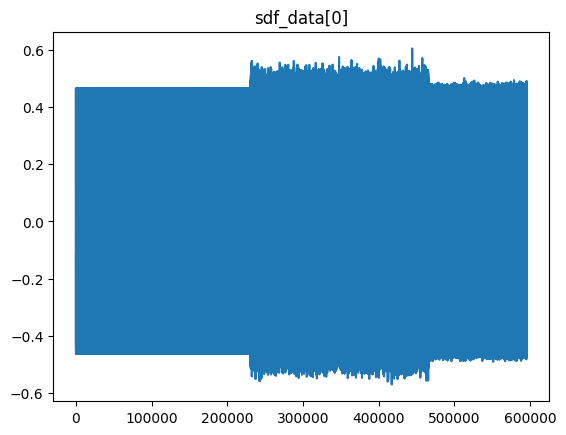

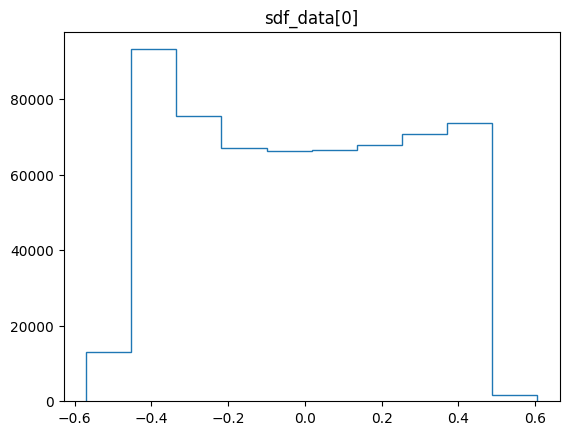

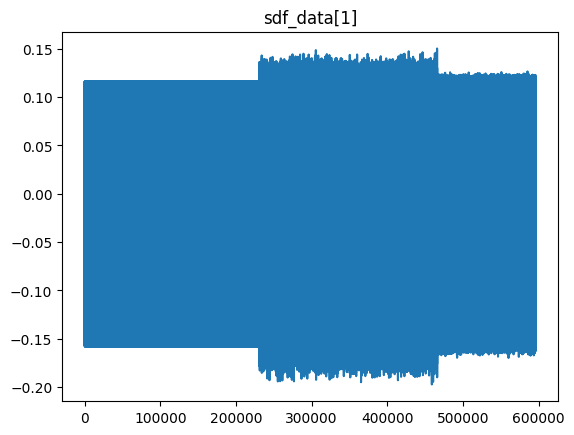

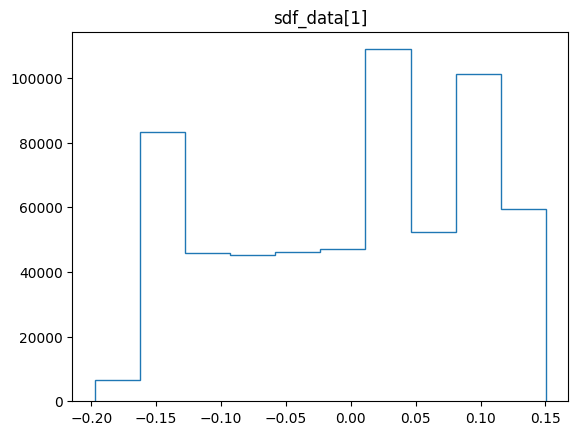

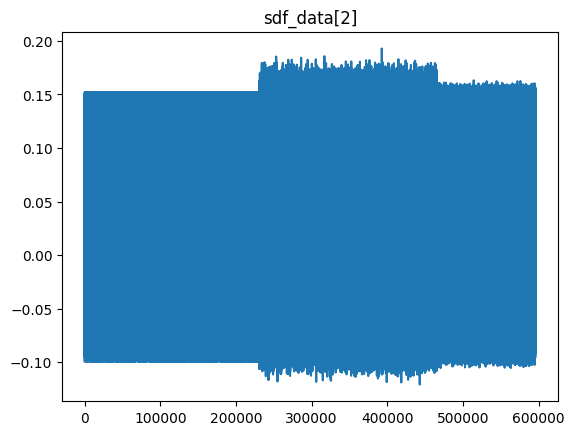

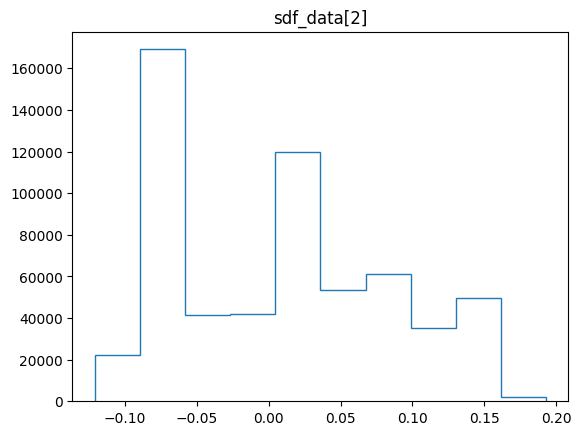

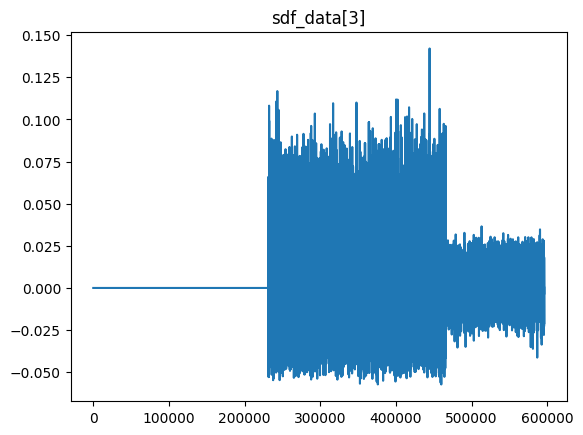

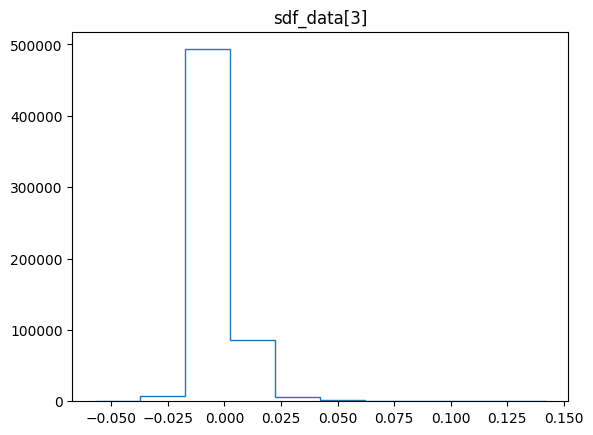

In [7]:
for d in range(4):
    plt.figure()
    plt.title(f'sdf_data[{d}]')
    plt.plot(sdf_data[:,d])
    plt.show()
    
    plt.figure()
    plt.title(f'sdf_data[{d}]')
    counts, bins = np.histogram(sdf_data[:,d])
    plt.stairs(counts, bins)
    plt.show()

So far, it seems they are coordinates + sdf distance in the fourth index

In [8]:
print('points:', sdf_data.shape)
print('sdf!=0 points:', sdf_data[sdf_data[:,3]!=0].shape)
print('sdf>0 points (outside):', sdf_data[sdf_data[:,3]>0].shape)
print('sdf<0 points (inside):', sdf_data[sdf_data[:,3]<0].shape)
xmin = sdf_data[:,0].min()
xmax = sdf_data[:,0].max()
ymin = sdf_data[:,1].min()
ymax = sdf_data[:,1].max()
zmin = sdf_data[:,2].min()
zmax = sdf_data[:,2].max()
print('max sdf:', sdf_data[:,3].max())
print('min sdf:', sdf_data[:,3].min())

points: (596000, 4)
sdf!=0 points: (365000, 4)
sdf>0 points (outside): (183220, 4)
sdf<0 points (inside): (181780, 4)
max sdf: 0.142107
min sdf: -0.0572768


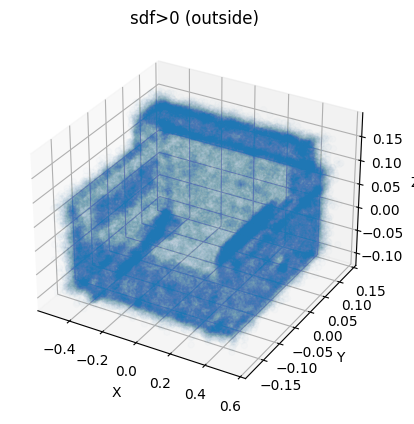

In [9]:
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf>0 (outside)')

thr = 0.005  # threshold
points = sdf_data[sdf_data[:,3]>thr]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

plt.show()

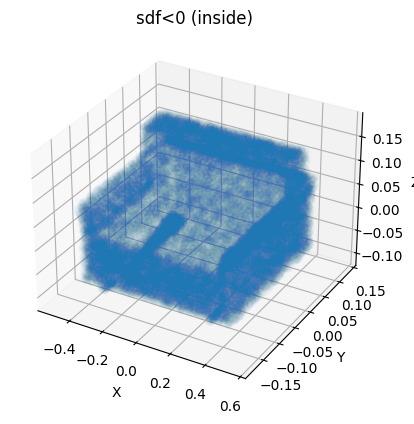

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf<0 (inside)')

thr = -0.005  # threshold
points = sdf_data[sdf_data[:,3]<thr]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

plt.show()

It has couch shape. Applying a threshold in last dimension limits point amount.

The sdf_data list is a point cloud for the couch object. Apparently, last dim corrsponds to sdf.

# GRID_GT analysis

In [11]:
GRID_GT='../train_sdf/data/grid_data/acronym/Couch/37cfcafe606611d81246538126da07a8/grid_gt.csv'

In [12]:
df = pd.read_csv(GRID_GT, sep=',', header=None)
grid_gt = df.values
print(grid_gt)  # np.ndarray

[[ 0.195652   -0.413043   -0.00724638  0.255061  ]
 [ 0.22449    -0.0204082  -0.142857    0.0569839 ]
 [-0.326087    0.210145   -0.5         0.421326  ]
 ...
 [ 0.413043   -0.355072    0.0362319   0.200471  ]
 [ 0.23913    -0.369565    0.471014    0.481927  ]
 [-0.485507    0.0652174   0.384058    0.236966  ]]


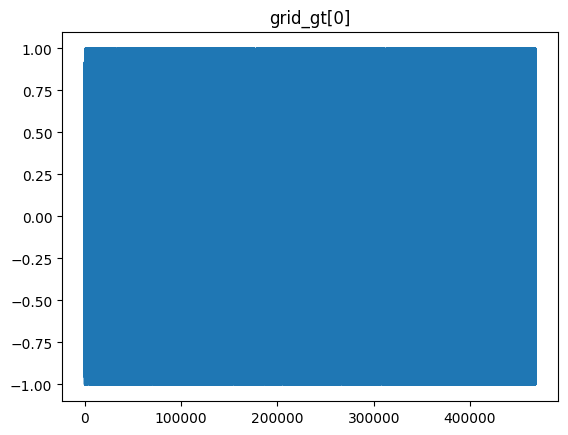

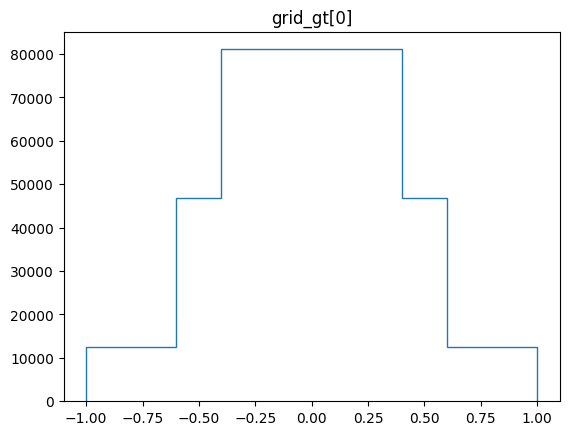

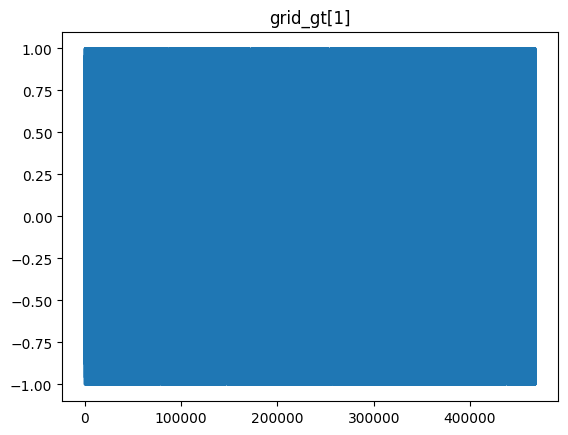

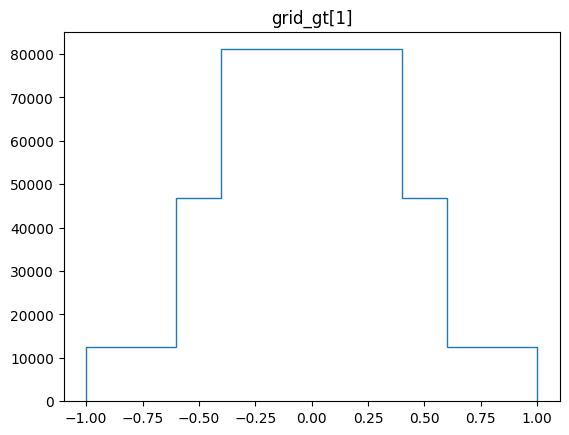

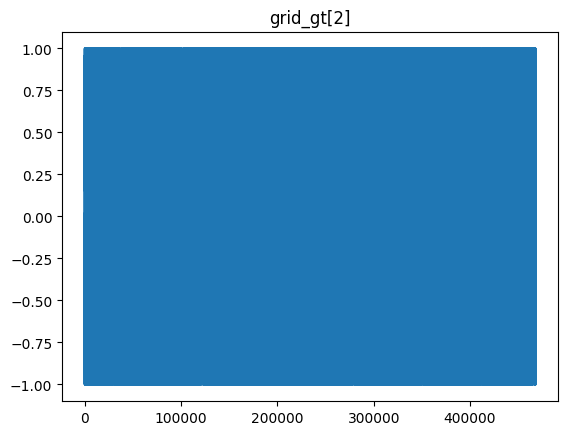

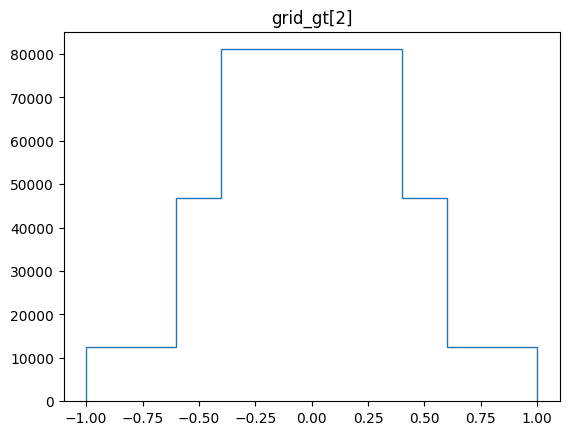

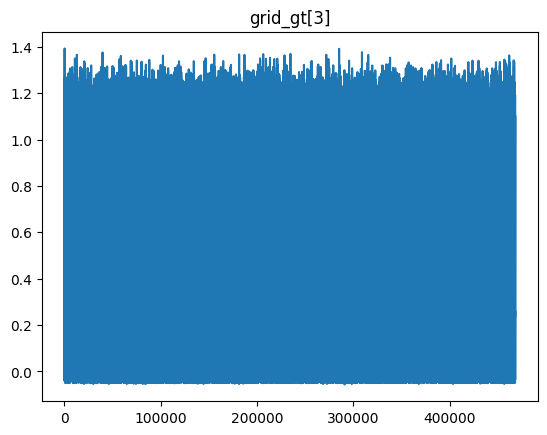

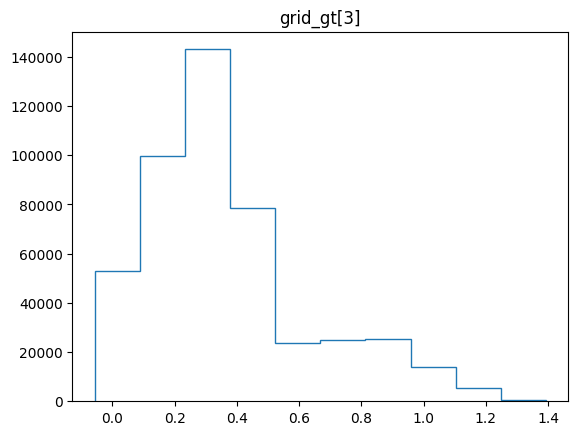

In [13]:
for d in range(4):
    plt.figure()
    plt.title(f'grid_gt[{d}]')
    plt.plot(grid_gt[:,d])
    plt.show()
    
    plt.figure()
    plt.title(f'grid_gt[{d}]')
    counts, bins = np.histogram(grid_gt[:,d])
    plt.stairs(counts, bins)
    plt.show()

It seems that first 3 dimensions are equally distributed. Probably, they will correspond to grid points. The last dimension will be the sdf value at those points.

In [14]:
print('points:', grid_gt.shape)
print('sdf!=0 points:', grid_gt[grid_gt[:,3]!=0].shape)
print('sdf>0 points (outside):', grid_gt[grid_gt[:,3]>0].shape)
print('sdf<0 points (inside):', grid_gt[grid_gt[:,3]>0].shape)
print('max sdf:', grid_gt[:,3].max())
print('min sdf:', grid_gt[:,3].min())

points: (468000, 4)
sdf!=0 points: (468000, 4)
sdf>0 points (outside): (455268, 4)
sdf<0 points (inside): (455268, 4)
max sdf: 1.39285
min sdf: -0.0565932


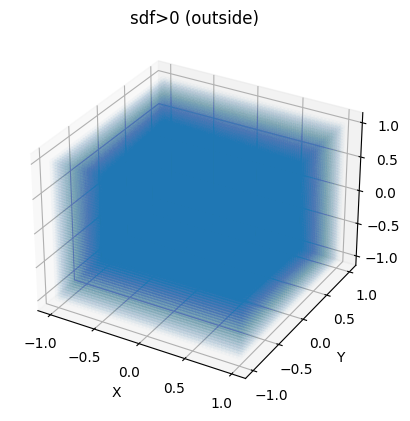

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf>0 (outside)')

points = grid_gt[grid_gt[:,3]>0]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

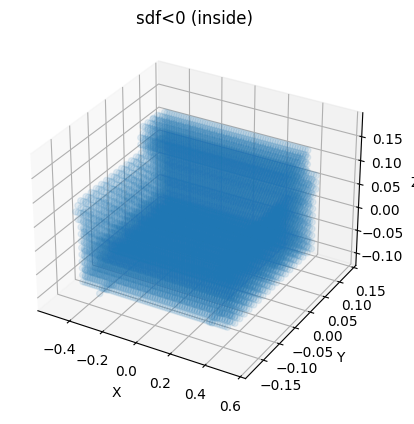

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('sdf<0 (inside)')

points = grid_gt[grid_gt[:,3]<0]

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, marker='o', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

plt.show()

It is a point cloud with sdf values in last dim, but the points are the whole grid.

WARNING: this grid_gt data contains both points in a grid and points near surface. the grid is linspace(-1,1,50).

# From grid_gt to marching cubes

In [17]:
df = pd.read_csv(GRID_GT, sep=',', header=None)

In [18]:
df = df.sort_values(by=list(range(4)), axis=0).reset_index(drop=True)
df

,0,1,2,3
0,-1.0,-1.0,-1.000000,1.36956
1,-1.0,-1.0,-0.959184,1.34259
2,-1.0,-1.0,-0.918367,1.31633
3,-1.0,-1.0,-0.877551,1.29083
4,-1.0,-1.0,-0.836735,1.26612
...,...,...,...,...
467995,1.0,1.0,0.836735,1.26951
467996,1.0,1.0,0.877551,1.29220
467997,1.0,1.0,0.918367,1.31576
467998,1.0,1.0,0.959184,1.34015


In [19]:
np.linspace(-1,1,50)

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [20]:
# extract only grid points, by hand

volume = np.zeros(shape=(50, 50, 50))

linsp = np.linspace(-1,1,50)

for i, x in enumerate(linsp):
    dfx = df[abs(df[0]-x)<1e-6]
    for j, y in enumerate(linsp):
        dfy = dfx[abs(dfx[1]-y)<1e-6]
        for k, z in enumerate(linsp):
            dfz = dfy[abs(dfy[2]-z)<1e-6]
            sdf = dfz.iloc[0][3]
            volume[i,j,k] = sdf

In [21]:
print(volume.shape)
print(np.sum(volume==0))
print(np.sum(volume>0))
print(np.sum(volume<0))
print(volume.min())
print(volume.max())

(50, 50, 50)
0
124430
570
-0.0546819
1.39285


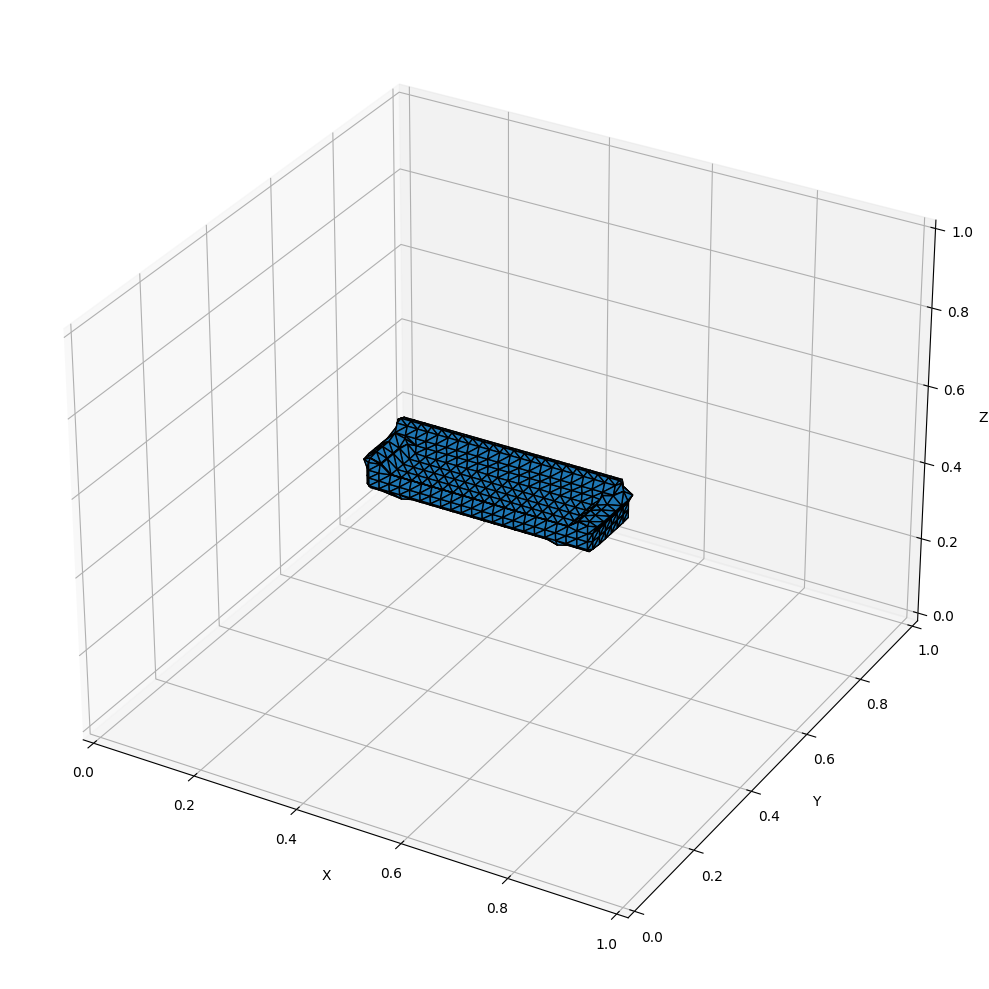

In [22]:
# https://scikit-image.org/docs/stable/auto_examples/edges/plot_marching_cubes.html
# https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.marching_cubes

verts, faces, normals, values = marching_cubes(volume, 0)
verts = verts / 50  # resize to [0,1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

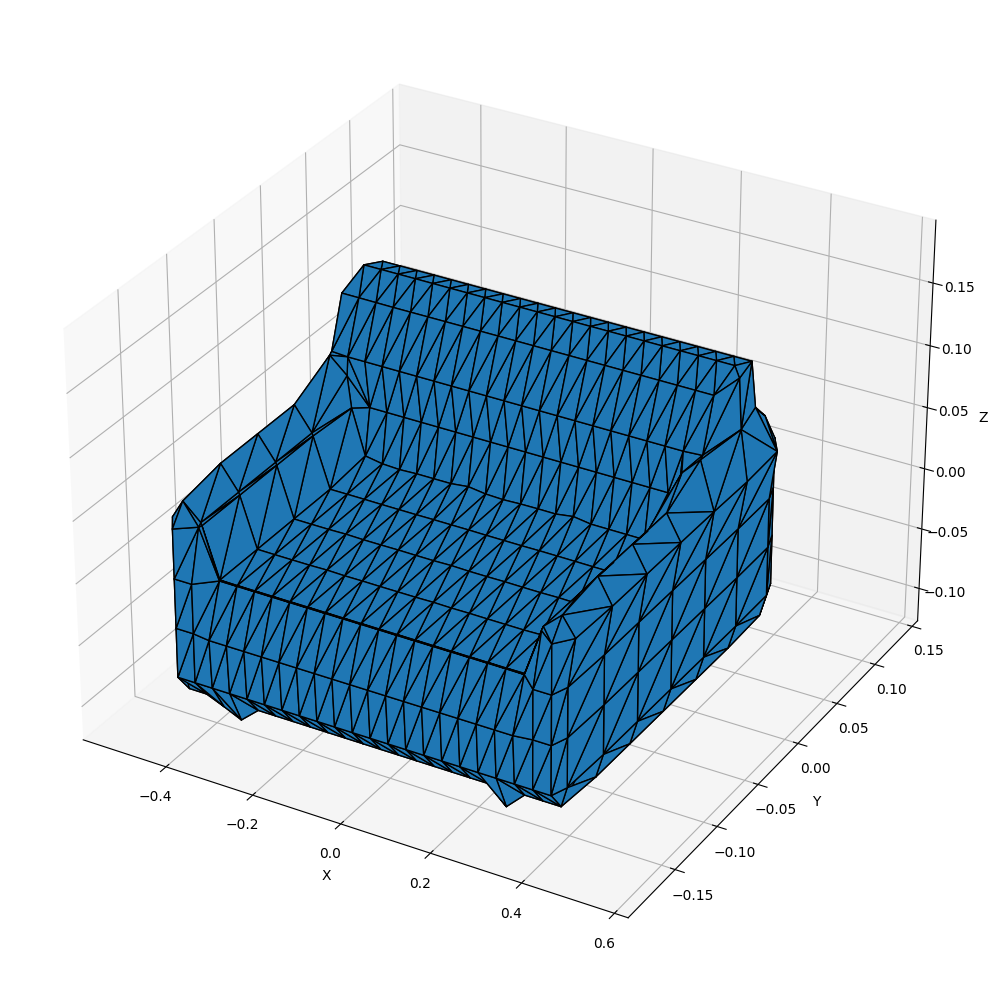

In [23]:
verts, faces, normals, values = marching_cubes(volume, 0)
verts = verts / 50  # resize to [0,1]
verts = verts * 2 - 1  # center and scale to [-1,1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

plt.tight_layout()
plt.show()